In [82]:
import cv2 as cv   #open source library, for Machine Learning applications, specifically in the Computer Vision domain 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #TensorFlow is an open source library for numerical computation and large-scale machine learning & multi_dimensional array
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense


In [83]:
# load dataset
mnist = tf.keras.datasets.mnist   #28*28 images size, imgs for hand written digits 0-9


In [84]:
# split data into train and test
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("Total training Sample = ", len(X_train))
print("Total testing Sample = ", len(X_test))

Total training Sample =  60000
Total testing Sample =  10000


In [85]:
##Example of wat is our dataset

# plt.imshow(X_train[0], cmap= plt.cm.binary)
# plt.show()
# print (X_train[0])

In [86]:

# normalize date --> scale it betwwen 0 and 1 to make it easy to network to learn
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)


# plt.imshow(X_train[0], cmap= plt.cm.binary)
# plt.show()
# print (X_train[0])

In [87]:
# make model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [88]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
model.fit(X_train, Y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4704 - accuracy: 0.8655
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1149 - accuracy: 0.9652
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0757 - accuracy: 0.9782


In [90]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 729us/step - loss: 0.0907 - accuracy: 0.9730


In [91]:
print(accuracy)

0.9729999899864197


In [92]:
print(loss)

0.09072145074605942


In [93]:
model.save('digits.model')

#new_model = tf.keras.models.load_model('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


The result is probably : 2


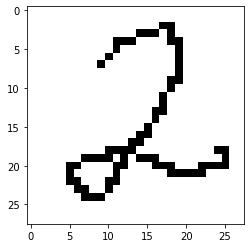

The result is probably : 9


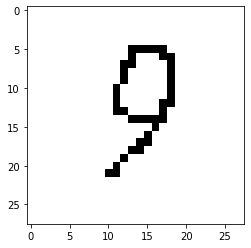

The result is probably : 1


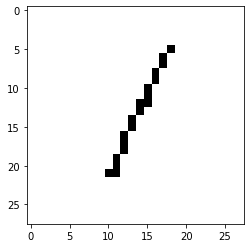

The result is probably : 3


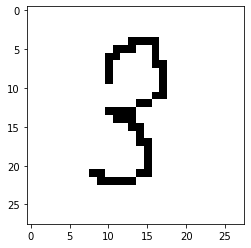

The result is probably : 0


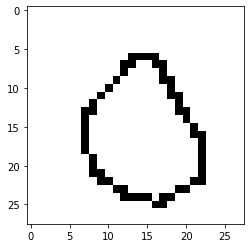

The result is probably : 2


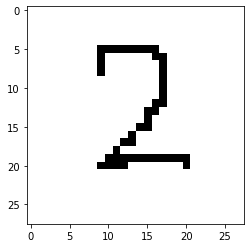

The result is probably : 8


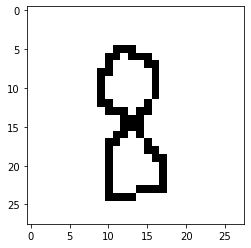

The result is probably : 5


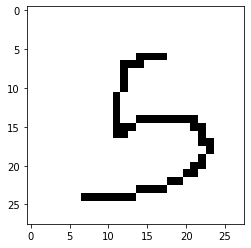

The result is probably : 9


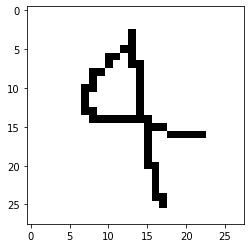

The result is probably : 3


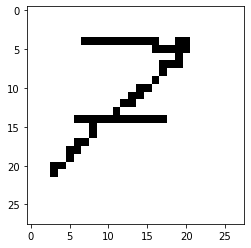

The result is probably : 8


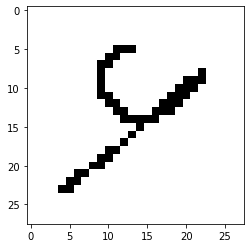

The result is probably : 6


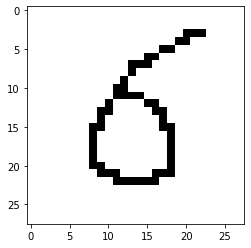

The result is probably : 5


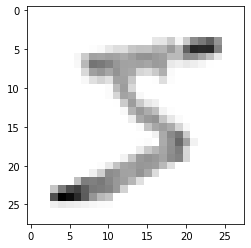

The result is probably : 0


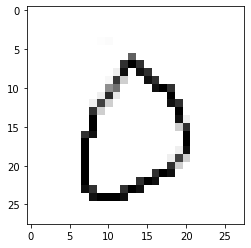

The result is probably : 9


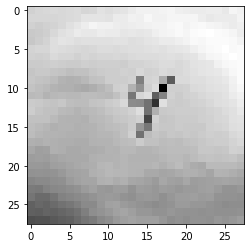

The result is probably : 1


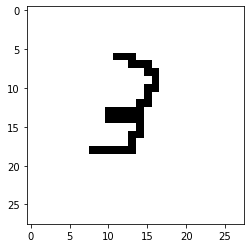

In [94]:
#PREDECTION OUR HANDWRITTEN DIGITS
for x in range(1, 17):
    img = cv.imread(f'{x}.png')[:, :, 0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The result is probably : {np.argmax(prediction)}')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()